# Data Transformation and Feature Extraction
## Convert a Categorical Variable to Dummy Variables

* Author: Owen Chen
* Date: 4/17/2022


In this notebook, we are going to deal with the various methods to convert Categorical Variables into Dummy Variables.

This is an essential part of data pre-processing, which in itself is an integral part of the Machine Learning or Statistical Model. 

### Categorical Variables:
Can be further subdivided into the following categories :

* **Binary or Dichotomous**:  variables that can have only two outcomes such as  Win/Lose, On/Off, and so on.

* **Nominal Variables**:  categorical variables to represent groups with no particular ranking such as colors, brands, and so on.

* **Ordinal Variables**: ranking variables to represent groups with a specified ranking order such as Winners of a race, App Ratings etc.

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import seaborn as sns

## The Dataset

This analysis uses the [Titanic dataset](https://www.kaggle.com/c/titanic/data) in order to predict whether a given person survived or not

This dataset has the following columns:

| Variable | Definition | Key |
| -------- | ---------- | --- |
| survival | Survival | 0 = No, 1 = Yes |
| pclass | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd |
| sex | Sex | |
| Age | Age in years | |
| sibsp | # of siblings / spouses aboard the Titanic | |
| parch | # of parents / children aboard the Titanic | |
| ticket | Ticket number | |
| fare | Passenger fare | |
| cabin | Cabin number | |
| embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |

To get started, we'll open up the CSV with Pandas.

(If you were using this for a machine learning project, you would additionally separate the dataframe into `X` and `y`, and then into train and test sets, but for the purposes of this example we'll assume that the entire `titanic.csv` contains training data.)

In [13]:
df = pd.read_csv("data/titanic/train.csv")

# PassengerId is a dataset artifact, not something useful for analysis
df.drop("PassengerId", axis=1, inplace=True)

# We want to use Age as one of the main examples, drop rows that are missing Age values
df.dropna(subset=["Age"], inplace=True)

df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Numeric vs. Categorical EDA

Here we are trying to see the relationship between a given numeric feature and the target, which is categorical.  Let's use the `Age` column as an example.

### What Not to Do

One thought we might have would be just to use a scatter plot, since the categorical target has already been encoded as 0s and 1s:

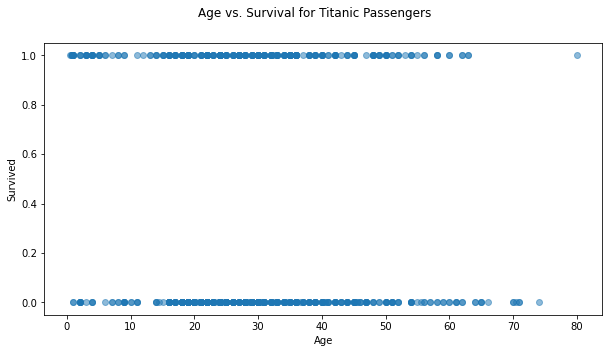

In [4]:
fig, ax = plt.subplots(figsize=(10,5))

ax.scatter(df["Age"], df["Survived"], alpha=0.5)

ax.set_xlabel("Age")
ax.set_ylabel("Survived")

fig.suptitle("Age vs. Survival for Titanic Passengers");

Ok, we can see that age seems to matter some, but it's pretty hard to extract much useful information from this visualization.  Let's try some other visualizations that tell us more

### Multiple Histograms

Rather than using the y axis to represent the two categories, let's use two different colors.  That means that we can use the y axis to represent counts rather than trying to discern this information from the density of dots.

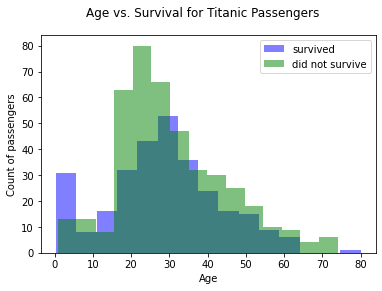

In [5]:
fig, ax = plt.subplots()

ax.hist(df[df["Survived"]==1]["Age"], bins=15, alpha=0.5, color="blue", label="survived")
ax.hist(df[df["Survived"]==0]["Age"], bins=15, alpha=0.5, color="green", label="did not survive")

ax.set_xlabel("Age")
ax.set_ylabel("Count of passengers")

fig.suptitle("Age vs. Survival for Titanic Passengers")

ax.legend();

### Multiple Density Estimate Plots

This is showing largely the same information as the histograms, except that it's a density estimate (estimate of the probability density function) rather than a count across bins.  Seaborn has nice built-in functionality for this.

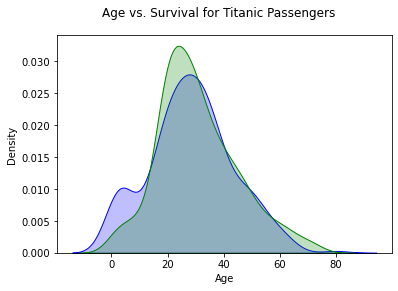

In [6]:
fig, ax = plt.subplots()

sns.kdeplot(df[df["Survived"]==1]["Age"], shade=True, color="blue", label="survived", ax=ax)
sns.kdeplot(df[df["Survived"]==0]["Age"], shade=True, color="green", label="did not survive", ax=ax)

ax.set_xlabel("Age")
ax.set_ylabel("Density")

fig.suptitle("Age vs. Survival for Titanic Passengers");

### Multiple Box Plots

Here we lose some of the information about the distribution overall in order to focus in on particular summary statistics of the distribution

<a title="Dcbmariano / CC BY-SA (https://creativecommons.org/licenses/by-sa/4.0)" href="https://commons.wikimedia.org/wiki/File:Box_plot_description.jpg"><img width="256" alt="Box plot description" src="https://upload.wikimedia.org/wikipedia/commons/a/ac/Box_plot_description.jpg"></a>

Matplotlib and Seaborn both have methods for this.  The Seaborn one is built on top of the Matplotlib one.

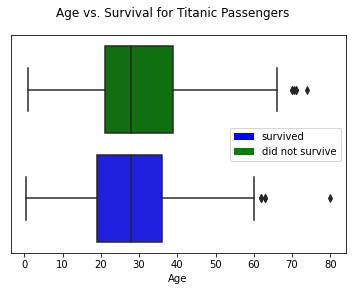

In [7]:
fig, ax = plt.subplots()

sns.boxplot(x="Age", y="Survived", data=df, orient="h", palette={1:"blue", 0:"green"}, ax=ax)

ax.get_yaxis().set_visible(False)

fig.suptitle("Age vs. Survival for Titanic Passengers")

color_patches = [
    Patch(facecolor="blue", label="survived"),
    Patch(facecolor="green", label="did not survive")
]
ax.legend(handles=color_patches);

## Categorical vs. Categorical EDA

Here we are trying to see the relationship between a given categorical variable and the target (which is also categorical).  Let's use the `Pclass` (passenger class) feature as an example.

### What Not to Do

Again, there is nothing _preventing_ us from just making a scatter plot, since the passenger class is encoded as a number

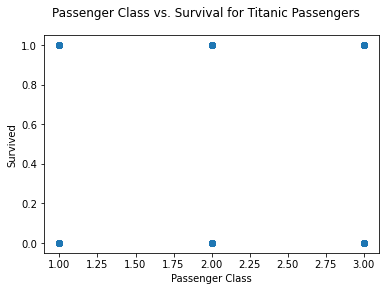

In [8]:
fig, ax = plt.subplots()

ax.scatter(df["Pclass"], df["Survived"], alpha=0.5)

ax.set_xlabel("Passenger Class")
ax.set_ylabel("Survived")

fig.suptitle("Passenger Class vs. Survival for Titanic Passengers");

...but that plot is not really useful at all.  It's really just telling us that at least 1 person falls into each category

### Grouped Bar Charts

This shows the distribution across the categories, similar to the "multiple histograms" example for numeric vs. categorical

* References:
https://seaborn.pydata.org/generated/seaborn.catplot.html

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)


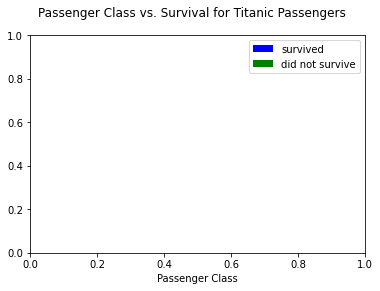

In [9]:
fig, ax = plt.subplots()

sns.catplot("Pclass", hue="Survived", data=df, kind="count", 
            palette={1:"blue", 0:"green"}, ax=ax)

plt.close(2) # catplot creates an extra figure we don't need

ax.set_xlabel("Passenger Class")

color_patches = [
    Patch(facecolor="blue", label="survived"),
    Patch(facecolor="green", label="did not survive")
]
ax.legend(handles=color_patches)

fig.suptitle("Passenger Class vs. Survival for Titanic Passengers");

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\owenj\AppData\Local\Temp\ipykernel_11988\2217680894.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["did not survive", "survived"])


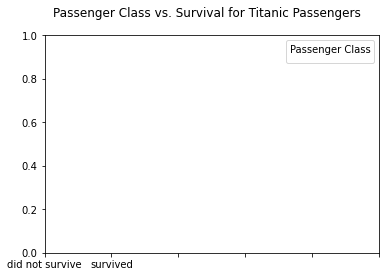

In [14]:
fig, ax = plt.subplots()

sns.catplot("Survived",data=df,hue="Pclass", kind="count", 
            palette={1:"yellow", 2:"orange", 3:"red"}, ax=ax)

plt.close(2) # catplot creates an extra figure we don't need

ax.legend(title="Passenger Class")
ax.set_xticklabels(["did not survive", "survived"])
ax.set_xlabel("")

fig.suptitle("Passenger Class vs. Survival for Titanic Passengers");

### Stacked Bar Charts

These can be used for counts (same as grouped bar charts) but if you use percentages rather than counts, they show proportions

In [15]:
# Create a dataframe with the counts by passenger class and survival
counts_df = df.groupby(["Pclass", "Survived"])["Name"].count().unstack()
counts_df

Survived,0,1
Pclass,,
1,64,122
2,90,83
3,270,85


In [16]:
# Divide by the total number and transpose for plotting
pclass_percents_df = counts_df.div(counts_df.sum()).T
pclass_percents_df

Pclass,1,2,3
Survived,,,
0,0.150943,0.212264,0.636792
1,0.420690,0.286207,0.293103


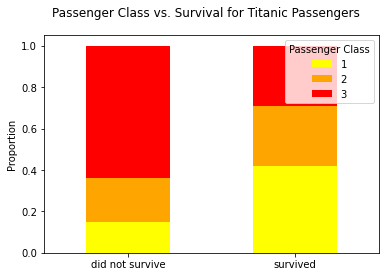

In [17]:
fig, ax = plt.subplots()

pclass_percents_df.plot(kind="bar", stacked=True, color=["yellow", "orange", "red"], ax=ax)

ax.legend(title="Passenger Class")
ax.set_xticklabels(["did not survive", "survived"], rotation=0)
ax.set_xlabel("")
ax.set_ylabel("Proportion")

fig.suptitle("Passenger Class vs. Survival for Titanic Passengers");

In [18]:
# Use the same counts df, but now survived + did not survive add up to 1
survived_percents_df = counts_df.T.div(counts_df.T.sum()).T
survived_percents_df

Survived,0,1
Pclass,,
1,0.344086,0.655914
2,0.520231,0.479769
3,0.760563,0.239437


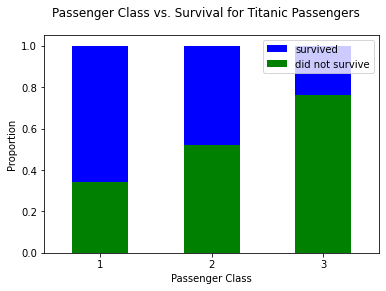

In [19]:
fig, ax = plt.subplots()

survived_percents_df.plot(kind="bar", stacked=True, color=["green", "blue"], ax=ax)

ax.set_xlabel("Passenger Class")
ax.set_xticklabels([1, 2, 3], rotation=0)
ax.set_ylabel("Proportion")

color_patches = [
    Patch(facecolor="blue", label="survived"),
    Patch(facecolor="green", label="did not survive")
]
ax.legend(handles=color_patches)

fig.suptitle("Passenger Class vs. Survival for Titanic Passengers");

## Numeric vs. Numeric vs. Categorical EDA

Sometimes it's interesting to see the relationship between two different numeric features and the target

### What Not to Do

You could just make a scatter plot of the two numeric features

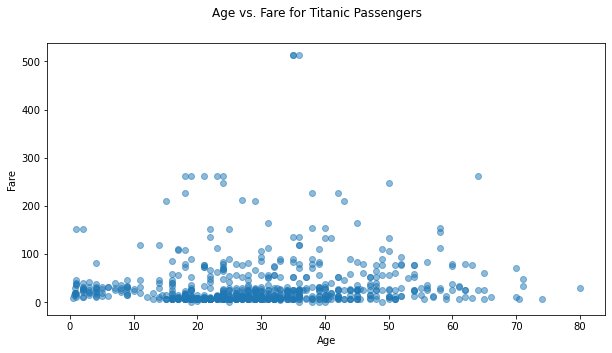

In [20]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.scatter(df["Age"], df["Fare"], alpha=0.5)

ax.set_xlabel("Age")
ax.set_ylabel("Fare")

fig.suptitle("Age vs. Fare for Titanic Passengers");

That's fine if the relationship between Age and Fare is what interests you, but it doesn't give you any information about the relationship between these features and the target

### Scatterplot with Color to Distinguish Categories

This kind of plot could help you understand how the two features relate to the target

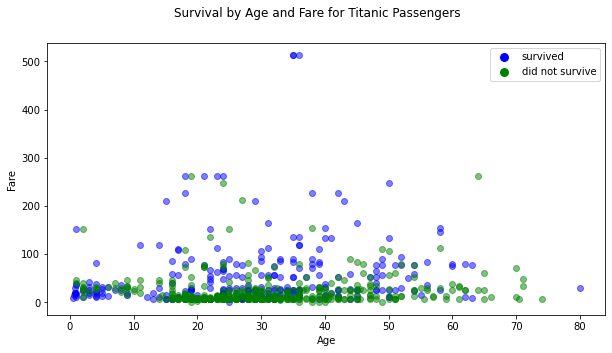

In [21]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.scatter(df[df["Survived"]==1]["Age"], df[df["Survived"]==1]["Fare"], c="blue", alpha=0.5)
ax.scatter(df[df["Survived"]==0]["Age"], df[df["Survived"]==0]["Fare"], c="green", alpha=0.5)

ax.set_xlabel("Age")
ax.set_ylabel("Fare")

color_patches = [
    Line2D([0], [0], marker='o', color='w', label='survived', markerfacecolor='b', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='did not survive', markerfacecolor='g', markersize=10)
]
ax.legend(handles=color_patches)

fig.suptitle("Survival by Age and Fare for Titanic Passengers");

## Summary

Most of the time if your target is a categorical variable, the best EDA visualization isn't going to be a basic scatter plot.  Instead, consider:

#### Numeric vs. Categorical (e.g. `Survived` vs. `Age`)
 - Multiple histograms
 - Multiple density estimate plots
 - Multiple box plots

#### Categorical vs. Categorical (e.g. `Survived` vs. `Pclass`)
 - Grouped bar charts
 - Stacked bar charts

#### Numeric vs. Numeric vs. Categorical (e.g. `Age` vs. `Fare` vs. `Survived`)
 - Color-coded scatter plots